In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [3]:
le=LabelEncoder()

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/concrete.csv")

In [5]:
df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
819,200.0,133.0,0.0,192.0,0.0,965.4,806.2,28,30.44
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
300,491.0,26.0,123.0,201.0,3.9,822.0,699.0,7,37.92
60,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,3,20.73
535,238.1,0.0,94.1,186.7,7.0,949.9,847.0,3,19.93
923,310.0,0.0,0.0,192.0,0.0,970.0,850.0,7,14.99
782,251.4,0.0,118.3,192.9,5.8,1043.6,754.3,14,20.73
675,230.0,0.0,118.3,195.5,4.6,1029.4,758.6,14,20.08
571,157.0,236.0,0.0,192.0,0.0,935.4,781.2,28,33.66


In [6]:
df.dtypes #one hot encoding not required

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

25


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()    #checking missing values

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [10]:
#No missing values 

In [11]:
df.shape

(1005, 9)

In [12]:
median1=df["slag"].median()

In [13]:
median1

20.0

In [14]:
df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
573,202.0,11.0,141.0,206.0,1.7,942.0,801.0,56,23.25
125,133.0,210.0,0.0,196.0,3.0,949.0,795.0,28,31.03
297,475.0,0.0,0.0,228.0,0.0,932.0,594.0,270,42.13
736,108.3,162.4,0.0,203.5,0.0,938.2,849.0,28,20.59
321,230.0,0.0,118.3,195.5,4.6,1029.4,758.6,56,31.54
424,393.0,0.0,0.0,192.0,0.0,940.6,785.6,7,27.74
389,159.0,187.0,0.0,176.0,11.0,990.0,789.0,28,32.76
423,284.0,15.0,141.0,179.0,5.5,842.0,801.0,56,44.52
368,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,14,19.42
172,212.1,0.0,121.6,180.3,5.7,1057.6,779.3,3,12.47


In [15]:
df['slag']=df['slag'].replace({0.0:median1})

In [16]:
df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
678,284.0,15.0,141.0,179.0,5.5,842.0,801.0,3,13.40
58,295.7,20.0,95.6,171.5,8.9,955.1,859.2,14,35.23
863,401.8,94.7,0.0,147.4,11.4,946.8,852.1,56,73.70
551,260.0,101.0,78.0,171.0,10.0,936.0,763.0,28,49.77
148,387.0,20.0,94.0,157.0,11.6,938.0,845.0,28,46.68
987,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,28,28.24
150,213.5,20.0,174.2,159.2,11.7,1043.6,771.9,14,29.59
252,153.0,239.0,0.0,200.0,6.0,1002.0,684.0,28,26.86
453,446.0,24.0,79.0,162.0,11.6,967.0,712.0,56,56.14
72,388.6,97.1,0.0,157.9,12.1,852.1,925.7,3,28.10


In [17]:
mean1=df["ash"].mean()

In [18]:
mean1

55.53631840796018

In [19]:
df['ash']=df['ash'].replace({0.0:mean1})

In [20]:
df.sample(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
210,184.0,86.0,190.000000,213.0,6.0,923.0,623.0,28,22.93
432,168.0,42.1,163.800000,121.8,5.7,1058.7,780.1,28,24.24
383,366.0,187.0,55.536318,191.0,7.0,824.0,757.0,28,65.91
997,164.0,163.0,128.000000,197.0,8.0,961.0,641.0,28,27.23
297,475.0,20.0,55.536318,228.0,0.0,932.0,594.0,270,42.13
394,173.5,50.1,173.500000,164.8,6.5,1006.2,793.5,3,23.08
929,321.4,20.0,127.900000,182.5,11.5,870.1,779.7,28,37.27
234,522.0,20.0,55.536318,146.0,0.0,896.0,896.0,7,50.51
681,160.2,188.0,146.400000,203.2,11.3,828.7,709.7,28,35.31
55,350.0,20.0,55.536318,186.0,0.0,1050.0,770.0,7,20.28


In [21]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

<AxesSubplot:>

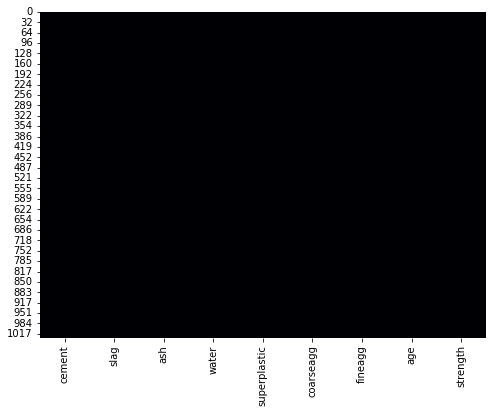

In [22]:
plt.figure(figsize = (8,6))
sns.heatmap(df.isnull(), cbar=False , cmap = 'magma')

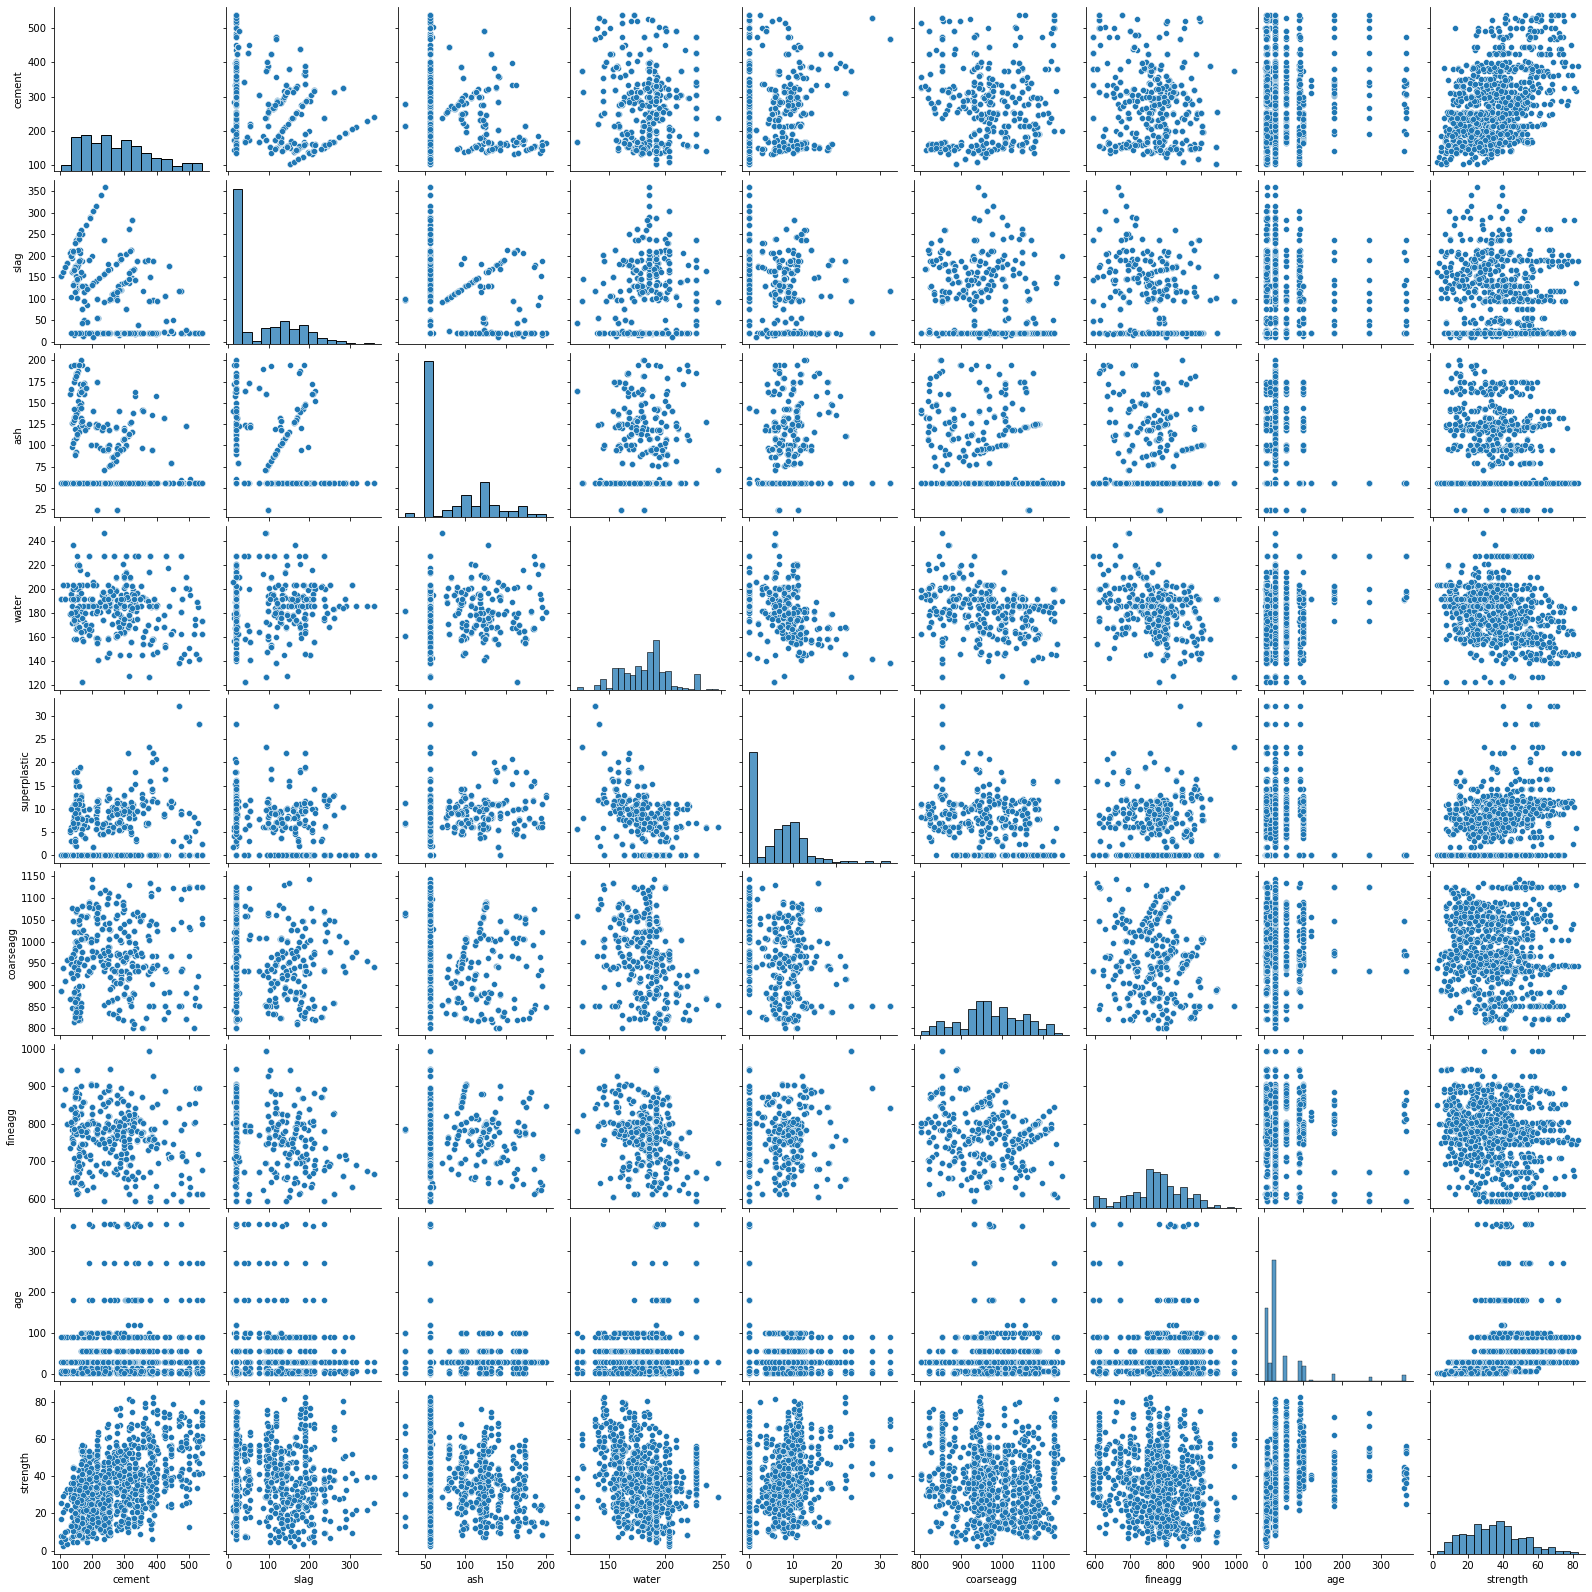

In [23]:
sns.pairplot(df)
plt.show()

In [24]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [25]:
#building our linear model
x=df.drop(['strength'],axis=1) #independent variables
y=df[['strength']] #dependent variable

In [26]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=1)

# Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

reg_model=LinearRegression(normalize=False)
reg_model.fit(x_train, y_train)

In [28]:
reg.score(x_train,y_train)

0.6028726391321861

In [29]:
reg.score(x_test,y_test)

0.5299584976416716

# Polynomial Regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [31]:
from sklearn.model_selection import cross_val_score 
degrees = [2, 3, 4, 5, 6] # Change degree "hyperparameter" here
normalizes = [True, False]# Change normalize hyperparameter here
best_score = 0
best_degree = 0
for degree in degrees:
    for normalize in normalizes:
        poly_features = PolynomialFeatures(degree = degree)
        X_train_poly = poly_features.fit_transform(x_train)
        polynomial_regressor = LinearRegression(normalize=normalize)
        polynomial_regressor.fit(X_train_poly, y_train)
        scores = cross_val_score(polynomial_regressor, X_train_poly, y_train, cv=5) # Change k-fold cv value here
        if max(scores) > best_score:
            best_score = max(scores)
            best_degree = degree
            best_normalize = normalize

C:\Users\RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = mak

C:\Users\RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed ple

C:\Users\RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you 

C:\Users\RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\RAJ\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = mak

In [32]:
print(best_score)

0.8886408334178467


In [33]:
print(best_normalize)
print(best_degree)

False
3


In [34]:
poly =  PolynomialFeatures(degree=3,interaction_only=False,order='F')
x_train2=poly.fit_transform(x_train)
x_test2=poly.fit_transform(x_test)

poly_clf=linear_model.LinearRegression(fit_intercept =bool)
poly_clf.fit(x_train2,y_train)

LinearRegression(fit_intercept=<class 'bool'>)

In [35]:
print(poly_clf.score(x_train2,y_train))

0.9347898764392477


In [36]:
print(poly_clf.score(x_test2,y_test))

0.8191373416819969


# KNN

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
knn=KNeighborsRegressor()

In [39]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)


0.7873462342836943

In [40]:
knn.score(x_test,y_test)

0.5923093660355908

# Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dtree=DecisionTreeRegressor(criterion="friedman_mse",max_depth=3)

In [43]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [44]:
dtree.score(x_train,y_train)

0.6512755639519854

In [45]:
dtree.score(x_test,y_test)

0.5044877731089985

# BaggingRegressor

In [46]:
from sklearn.ensemble import BaggingRegressor
br=BaggingRegressor(base_estimator=dtree,n_estimators=1000)
br.fit(x_train,y_train)

C:\Users\RAJ\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                      max_depth=3),
                 n_estimators=1000)

In [47]:
br.score(x_train,y_train)

0.7262345453423316

In [48]:
br.score(x_test,y_test)

0.6356872874880899

# GridSearchCV  #To find out perefct hyperparameter values

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time
from sklearn.model_selection import GridSearchCV

In [50]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
]

In [51]:
for model in regressors[:head]:
    start = time()
    model.fit(x_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(x_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

NameError: name 'head' is not defined

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
parameters = {'criterion' : ["squared_error", "absolute_error", "poisson"],
              'n_estimators':[10,100,1000],
              'max_features' : ['sqrt', 'log2']
             }
grid = GridSearchCV(RandomForestRegressor(),parameters)
model = grid.fit(x,y)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

# GradientBoostRegressor

In [ ]:
gbr=GradientBoostingRegressor(criterion='mse',max_features='sqrt', n_estimators=100)

In [ ]:
gbr.fit(x_train,y_train) 

In [ ]:
gbr.score(x_train,y_train)

In [ ]:
gbr.score(x_test,y_test)

# RandomForestRegressor

In [ ]:
rf=RandomForestRegressor(max_features='log2', n_estimators=1000)
rf.fit(x_train,y_train)

In [ ]:
rf.score(x_train,y_train)

In [ ]:
rf.score(x_test,y_test)

#After all possible regression models, only GradientBoostingRegressor performs well with both
train and test data having scores 0.9405701164333542 and 0.9013384288185726 respectively. 